# Fourier Series Exercise

The function is:

$$ f(x) = | x | \, , \quad x \in [-\pi,\pi) $$ 

The Fourier Series coefficients:

$$ a_0 = \frac{1}{\pi} \int_{-\pi}^{\pi} |x| dx =  \frac{1}{\pi} \left( \int_{0}^{\pi} x dx - \int_{-\pi}^{0} x dx \right) = \frac{1}{\pi} \left( \frac{\pi^2}{2} + \frac{\pi^2}{2} \right) = \pi$$

$$ a_k = \frac{1}{\pi} \int_{-\pi}^{\pi} |x| \cos(kx) dx = \frac{2}{\pi} \int_{0}^{\pi} x \cos(kx) dx = \frac{2}{\pi} \left\{ \left[ x \frac{\sin(kx)}{k} \right]_{0}^{\pi} - \int_{0}^{\pi} \frac{\sin(kx)}{k} dx \right\} = 0 + \frac{2}{\pi} \left[ x \frac{\cos(kx)}{k^2} \right]_{0}^{\pi} = \frac{2}{\pi k^2} \left[ \cos (k\pi) - 1\right]$$

$a_k$ is different from zero only for odd values of $k$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Series coefficients')

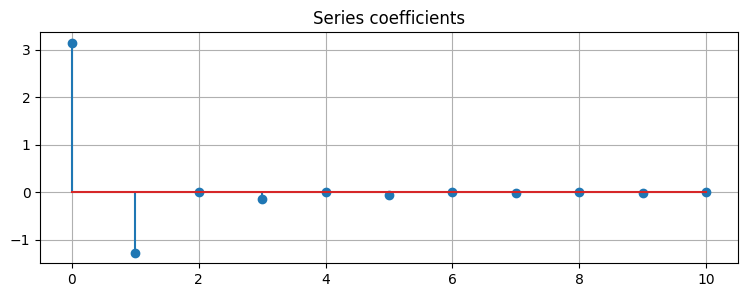

In [6]:
N_components = 11
k = np.arange(1, N_components)
a0 = np.pi
ak = (2 / (np.pi * k**2)) * (np.cos(k * np.pi) - 1) 
a = np.concatenate(([a0], ak))
k1 = np.concatenate(([0], k))

plt.figure(figsize=(9,3))
plt.stem(k1, a)
plt.grid(True)
plt.title('Series coefficients')

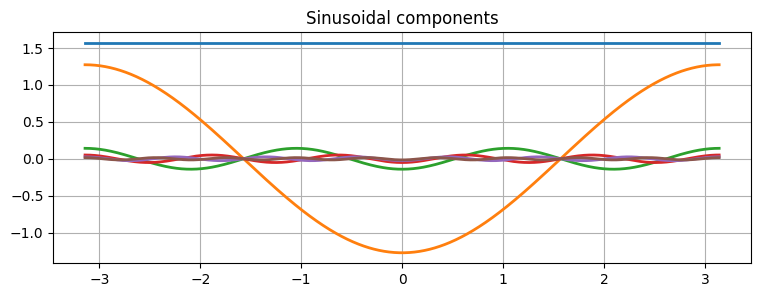

In [3]:
# Signal construction
jumpEven = True

N = 1000
x = np.linspace(-np.pi, np.pi, N)
sig = np.zeros((len(k1), N))
sig[0, :] = 0.5 * a[0] * np.cos(k1[0] * x)

plt.figure(figsize=(9,3))
plt.plot(x,sig[0, :], linewidth=2)
plt.grid(True)
plt.title('Sinusoidal components')

for ind in range(1, len(k1)):
    if jumpEven:
        if ind % 2:
            sig[ind, :] = a[ind] * np.cos(k1[ind] * x)
            plt.plot(x,sig[ind, :], linewidth=2)
    else:
        sig[ind, :] = a[ind] * np.cos(k1[ind] * x)
        plt.plot(x,sig[ind, :], linewidth=2)

0.0117


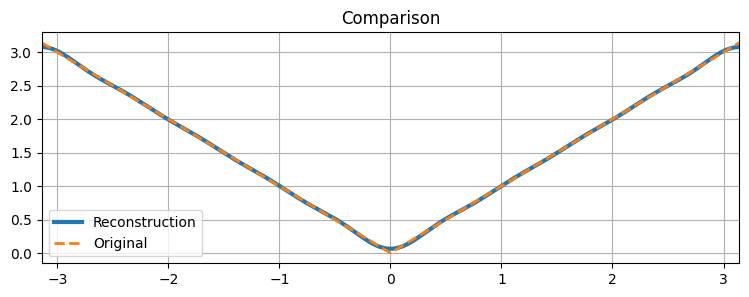

In [4]:
# Synthesis of the signal
synth = np.sum(sig, axis=0)

plt.figure(figsize=(9,3))
plt.plot(x, synth, linewidth=3)
plt.grid(True)
plt.plot(x, np.abs(x), '--', linewidth=2)
plt.xlim([-np.pi, np.pi])
plt.legend(['Reconstruction', 'Original'])
plt.title('Comparison')

RMSE = np.sqrt((1/N)*np.sum((synth-np.abs(x))**2))
print(np.round(RMSE,4))